# Problem set 4: Analyzing data

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [27]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [28]:
nah1 = dst.get_data(table_id = 'NAH1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})
nah1_true = nah1.copy()

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [29]:
nah1_true.rename(columns=columns_dict,inplace=True)

for key,value in var_dict.items():
   nah1_true.variable.replace(key, value, inplace=True)

for key,value in unit_dict.items():
   nah1_true.unit.replace(key, value, inplace=True)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [30]:
# write you code here
I = False
for key,value in var_dict.items():
    I = I | (nah1_true.variable == value)
nah1_true = nah1_true[I]

nah1_true.value = nah1_true.value.astype('float')
nah1_true

,variable,unit,year,value
6,Y,real,1999,2598080.0
7,Y,nominal,1999,2014271.0
22,C,real,1999,1150485.0
23,C,nominal,1999,907708.0
24,G,real,1999,400446.0
...,...,...,...,...
3395,I,nominal,1990,177942.0
3404,X,real,1990,407305.0
3405,X,nominal,1990,311621.0
3410,M,real,1990,312939.0


**Step 4:** Discuss what the following summary statistics show.

In [31]:
nah1_true.groupby(['variable','unit']).describe()

year                                                     \
                 count    mean        std     min     25%     50%     75%   
variable unit                                                               
C        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
G        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
I        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
M        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
X        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
Y        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2022.0  57.0  8.047029e+05  5.306998e+05    62576.0   
         real     2022.0  57.0  1.067326e+06  2.842691e+05   549491.0   
G        nominal  2022.0  57.0  2.730288e+05  1.880838e+05    14768.0   
         real     2022.0  57.0  3.737795e+05  1.041112e+05   171307.0   
I        nominal  2022.0  57.0  2.375686e+05  1.682388e+05    21134.0   
         real     2022.0  57.0  2.823976e+05  1.143270e+05   127630.0   
M        nominal  2022.0  57.0  4.681651e+05  4.044817e+05    24406.0   
         real     2022.0  57.0  5.032454e+05  3.358996e+05   112171.0   
X        nominal  2022.0  57.0  5.279656e+05  4.653913e+05    23110.0   
         real     2022.0  57.0  5.846486e+05  3.778421e+05   123594.0   
Y        nominal  2022.0  57.0  1.889868e+06  1.350346e+06   144582.0   
         real     2022.0  57.0  2.367772e+06  8.495330e+05  1089347.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   322000.0   748365.0  1305931.0  1813301.0  
         real      847062.0  1040029.0  1343243.0  1556887.0  
G        nominal   105298.0   242403.0   452185.0   615429.0  
         real      310237.0   355506.0   473421.0   537877.0  
I        nominal    80672.0   186087.0   353247.0   687274.0  
         real      183220.0   236281.0   359370.0   566934.0  
M        nominal   132098.0   307210.0   789148.0  1642000.0  
         real      213097.0   363124.0   803852.0  1218214.0  
X        nominal   130293.0   366045.0   895202.0  1939362.0  
         real      245273.0   475081.0   914933.0  1394882.0  
Y        nominal   677930.0  1603057.0  3093079.0  5227195.0  
         real     1615002.0  2210638.0  3198587.0  4015530.0

**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [32]:
pop = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']})
pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head()

,year,population
0,2010,5534738
2,1769,797584
3,1840,1289075
4,1860,1608362
5,1901,2449540


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [33]:
# hint, merged = pd.merge(?,?,how='?',on=[?])
merged = pd.merge(nah1_true,pop,how='left',on=['year'])
merged.tail(10)

,variable,unit,year,value,population
674,C,real,1990,947408.0,5135409.0
675,C,nominal,1990,630079.0,5135409.0
676,G,real,1990,326540.0,5135409.0
677,G,nominal,1990,204535.0,5135409.0
678,I,real,1990,227572.0,5135409.0
679,I,nominal,1990,177942.0,5135409.0
680,X,real,1990,407305.0,5135409.0
681,X,nominal,1990,311621.0,5135409.0
682,M,real,1990,312939.0,5135409.0
683,M,nominal,1990,264085.0,5135409.0


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [34]:
# pop_with_index = pop.set_index(?)
pop_with_index = pop.set_index('year')
# pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
# merged_with_index = merged.set_index(?)
merged_with_index = merged.set_index('year')
# merged_alt = merged_with_index.join(?)
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2022,C,real,1515034.0,5873420.0,5873420.0
2022,C,nominal,1813301.0,5873420.0,5873420.0
2022,G,real,519317.0,5873420.0,5873420.0
2022,G,nominal,615429.0,5873420.0,5873420.0
2022,I,real,566934.0,5873420.0,5873420.0
2022,I,nominal,687274.0,5873420.0,5873420.0
2022,X,real,1394882.0,5873420.0,5873420.0
2022,X,nominal,1939362.0,5873420.0,5873420.0
2022,M,real,1218214.0,5873420.0,5873420.0


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

In [35]:
# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'
nah1_true_grouped_first

variable  unit   
C         nominal     907708.0
          real       1150485.0
G         nominal     302509.0
          real        400446.0
I         nominal     259326.0
          real        311578.0
M         nominal     414592.0
          real        482738.0
X         nominal     489079.0
          real        619082.0
Y         nominal    2014271.0
          real       2598080.0
Name: first, dtype: float64

In [36]:
# b. apply
nah1_true.set_index(['variable','unit'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)
nah1_true

,variable,unit,year,value,first
0,Y,real,1999,2598080.0,2598080.0
1,Y,nominal,1999,2014271.0,2014271.0
2,C,real,1999,1150485.0,1150485.0
3,C,nominal,1999,907708.0,907708.0
4,G,real,1999,400446.0,400446.0
...,...,...,...,...,...
679,I,nominal,1990,177942.0,259326.0
680,X,real,1990,407305.0,619082.0
681,X,nominal,1990,311621.0,489079.0
682,M,real,1990,312939.0,482738.0


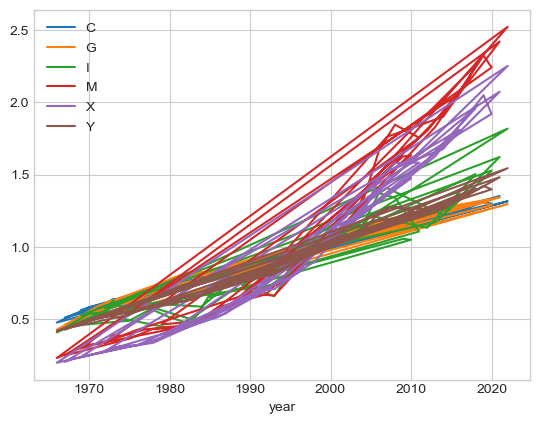

In [37]:
# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
plot(nah1_true)

**Question** Implement the same split-apply-combine as above using `transform`.

In [42]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_true_alt = nah1_true.copy()
grouped = nah1_true_alt.groupby(['variable','unit'])
nah1_true_alt['index_transform'] = grouped['value'].transform(lambda x: x/first(x))
nah1_true_alt.head()

,variable,unit,year,value,first,indexed,index_transform
0,Y,real,1999,2598080.0,2598080.0,1.0,1.0
1,Y,nominal,1999,2014271.0,2014271.0,1.0,1.0
2,C,real,1999,1150485.0,1150485.0,1.0,1.0
3,C,nominal,1999,907708.0,907708.0,1.0,1.0
4,G,real,1999,400446.0,400446.0,1.0,1.0


**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [43]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [44]:
# a. load data
pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# c. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop.head()

,municipality,population,date
0,Hvidovre,51270,2012-10-01
1,Gentofte,75365,2016-04-01
2,Langeland,12553,2017-04-01
3,Rudersdal,56525,2019-04-01
4,Holbæk,71272,2019-04-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

Text(0, 0.5, 'log difference in price')

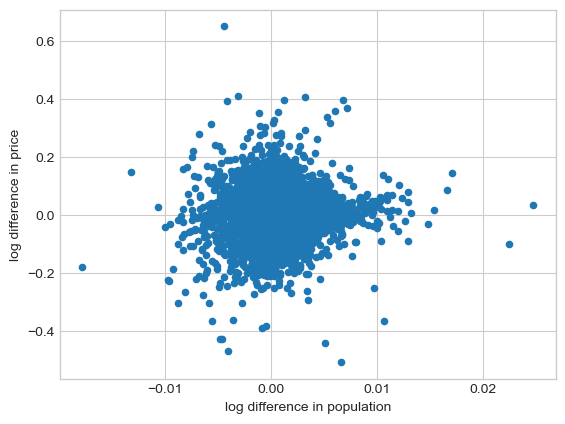

In [45]:
# a. merge
full = pd.merge(pop, prices_long, on=['date','municipality'], how='left')
full.sort_values(['municipality','date'], inplace=True)

# b. take logs
full['log_population'] =  np.log(full['population'])
full['log_price'] =  np.log(full['price'])

# c. figur 1: log differences
ax = full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price')

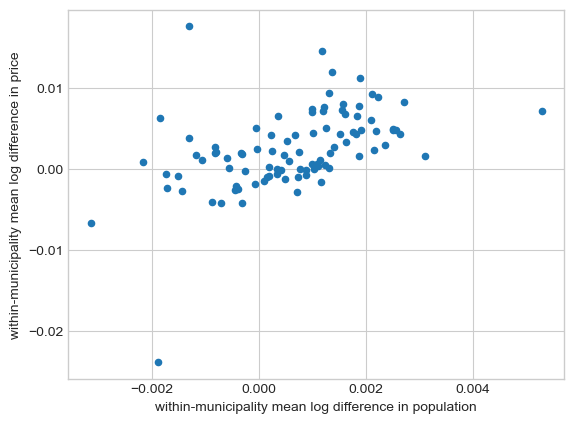

In [46]:
# c. figur 2: mean log differences
ax = full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price'); 

**Answer:** See A5.py for difference within total population. See A6.py for difference within municipality